In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.arima.model import ARMA
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')

In [ ]:
aqi = pd.read_csv('/content/drive/MyDrive/Data Science/AQI.csv')

In [ ]:
aqi.fillna(0,inplace=True)

In [ ]:
aqi

,PM10 C Low,PM10 C high,PM2.5 C Low,PM2.5 C high,CO C Low,CO C high,SO2 C Low,SO2 C high,NO2 C Low,NO2 C high,NOX C low,NOX C high,O3 C Low,O3 C high,AQI ILow,AQI Ihigh
0,0,54,0.0,12.0,0.0,4.4,0,35,0,53,0,40.0,0.000,0.540,0,50
1,55,154,12.1,35.4,4.5,9.4,36,75,54,100,81,180.0,0.055,0.070,51,100
2,155,254,35.5,55.4,9.5,12.4,76,185,101,360,41,80.0,0.071,0.085,101,150
3,255,354,55.5,150.4,12.5,15.4,186,304,361,649,181,280.0,0.086,0.105,151,200
4,355,424,150.5,250.4,15.5,30.4,305,604,650,1249,281,400.0,0.106,0.200,201,250
5,425,504,250.5,350.4,30.5,40.4,605,804,1250,1649,400,0.0,0.000,0.000,250,300


In [ ]:
df.head()

,#,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
0,1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
1,2,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2,3,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
3,4,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
4,5,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


In [ ]:
df.tail()

,#,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
8638,8639,2023-05-01 23:30:00,2023-05-01 23:45:00,19.00,11.00,20.80,100.20,70.20,0.58,9.50,10.80,30.00,0.10
8639,8640,2023-05-01 23:45:00,2023-05-02 00:00:00,32.00,6.00,21.80,98.80,70.30,NaN,NaN,11.00,33.50,0.10
8640,8641,Min,NaN,12.00,3.00,0.10,0.20,4.20,0.10,0.10,4.60,0.10,0.10
8641,8642,Max,NaN,847.00,474.00,157.50,106.90,165.20,4.00,645.60,62.40,123.80,0.60
8642,8643,Avg.,NaN,181.41,75.69,14.65,55.76,42.67,1.41,34.23,13.24,35.63,0.18


In [ ]:
df_last = df.tail(3)
df.drop(df.tail(3).index,inplace=True)

In [ ]:
df['From'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8640 entries, 0 to 8639
Series name: From
Non-Null Count  Dtype         
--------------  -----         
8640 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 67.6 KB


In [ ]:
# df.set_index('From', inplace=True)

In [ ]:
print("Shape of the data is ",df.shape)
print("Column datatypes =\n",df.dtypes)

Shape of the data is  (8640, 13)
Column datatypes =
 #                                                                    int64
From                                                        datetime64[ns]
To (Interval: 15M)                                                  object
Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)              float64
Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)             float64
Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)                float64
Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)               float64
Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)                 float64
Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)                float64
Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)               float64
Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)               float64
Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)             float64
Singrauli, Surya Kiran Bhawan Dudhichua  Benzen

In [ ]:
# Set plot size
rcParams['figure.figsize'] = 15, 17
# Rename the columns
df.rename(columns={'Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)':'PM10 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)':'PM2.5 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)':'NO (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)':'NO2 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)':'NOX (ppb)','Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)':'CO (mg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)':'SO2 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)':'NH3 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)':'Ozone (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)':'Benzene (µg/m3)'},inplace=True)

In [ ]:

df['Time']=df['From'].dt.time
df['Date']=df['From'].dt.date

In [ ]:
df.tail()

,#,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3),Time,Date
8635,8636,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1,22:45:00,2023-05-01
8636,8637,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1,23:00:00,2023-05-01
8637,8638,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1,23:15:00,2023-05-01
8638,8639,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8,100.2,70.2,0.58,9.5,10.8,30.0,0.1,23:30:00,2023-05-01
8639,8640,2023-05-01 23:45:00,2023-05-02 00:00:00,32.0,6.0,21.8,98.8,70.3,NaN,NaN,11.0,33.5,0.1,23:45:00,2023-05-01


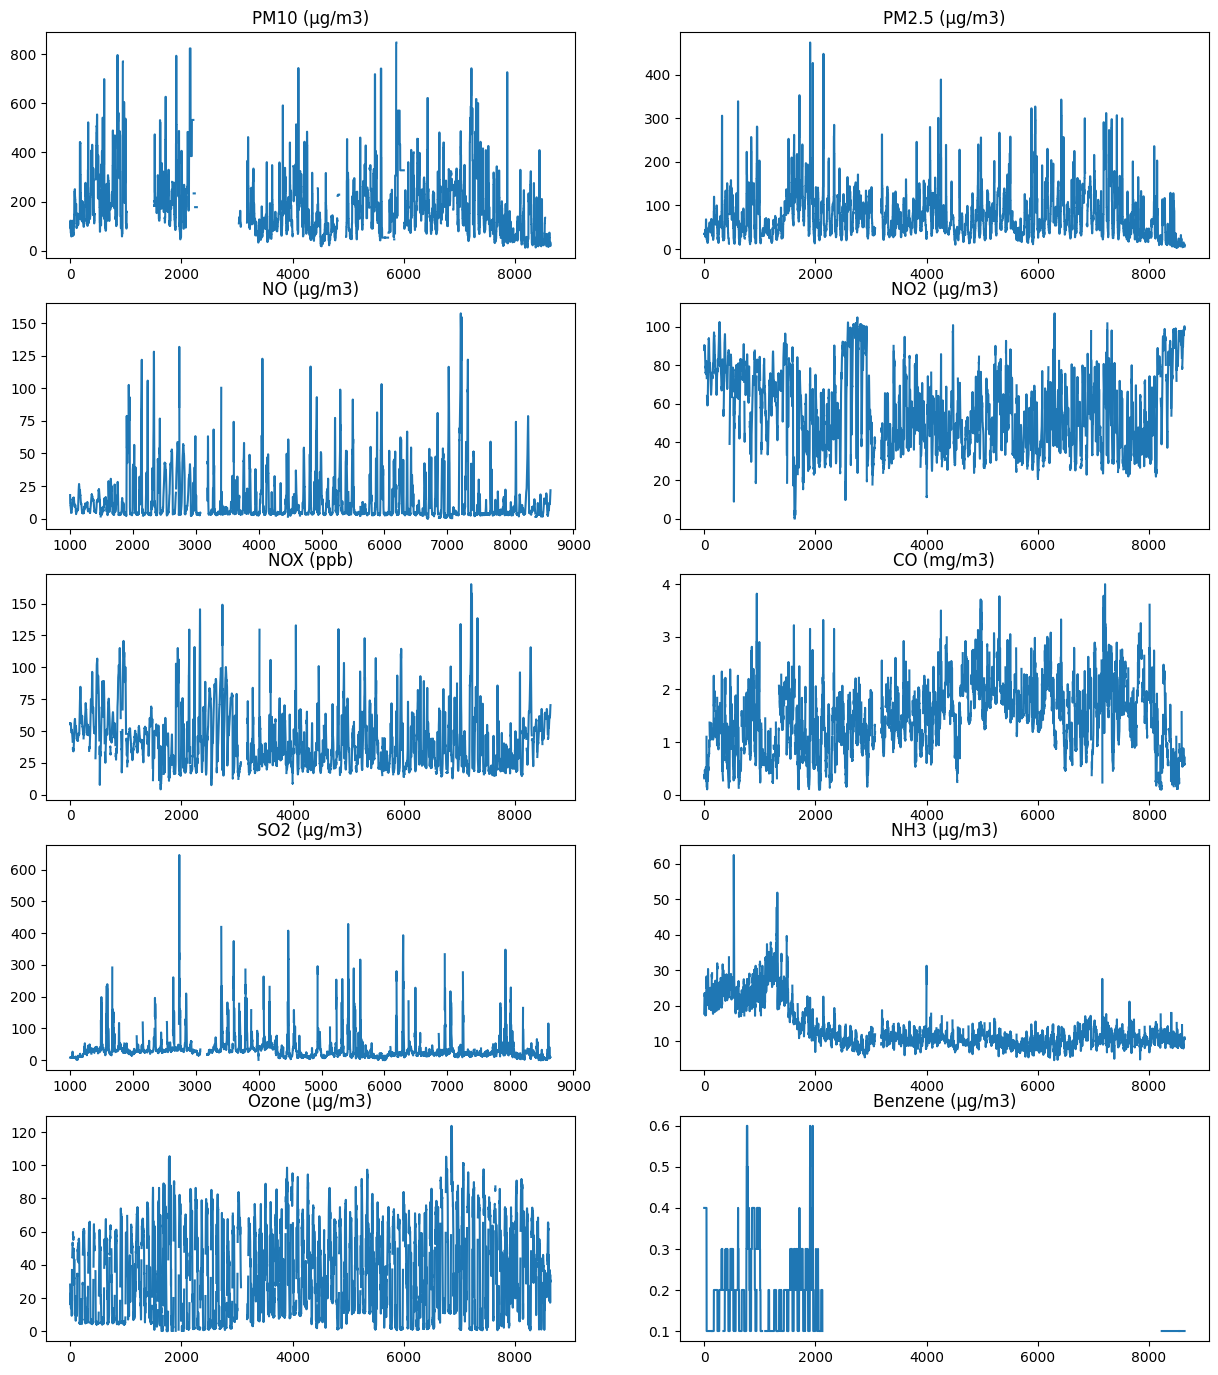

In [ ]:
# To plot multivariate data
figure, axis = plt.subplots(5,2)
axis[0,0].plot(df['PM10 (µg/m3)'])
axis[0,0].set_title("PM10 (µg/m3)")
axis[0,1].plot(df['PM2.5 (µg/m3)'])
axis[0,1].set_title("PM2.5 (µg/m3)")
axis[1,0].plot(df['NO (µg/m3)'])
axis[1,0].set_title("NO (µg/m3)")
axis[1,1].plot(df['NO2 (µg/m3)'])
axis[1,1].set_title("NO2 (µg/m3)")
axis[2,0].plot(df['NOX (ppb)'])
axis[2,0].set_title('NOX (ppb)')
axis[2,1].plot(df['CO (mg/m3)'])
axis[2,1].set_title('CO (mg/m3)')
axis[3,0].plot(df['SO2 (µg/m3)'])
axis[3,0].set_title('SO2 (µg/m3)')
axis[3,1].plot(df['NH3 (µg/m3)'])
axis[3,1].set_title('NH3 (µg/m3)')
axis[4,0].plot(df['Ozone (µg/m3)'])
axis[4,0].set_title('Ozone (µg/m3)')
axis[4,1].plot(df['Benzene (µg/m3)'])
axis[4,1].set_title('Benzene (µg/m3)')
ax = plt.gca()
# ax.tick_params(axis='x', labelrotation = 45)
plt.show()

In [ ]:
df.isnull().sum()

#                        0
From                     0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
NO2 (µg/m3)            416
NOX (ppb)              415
CO (mg/m3)             496
SO2 (µg/m3)           1451
NH3 (µg/m3)            326
Ozone (µg/m3)          453
Benzene (µg/m3)       6195
Time                     0
Date                     0
dtype: int64

<Axes: >

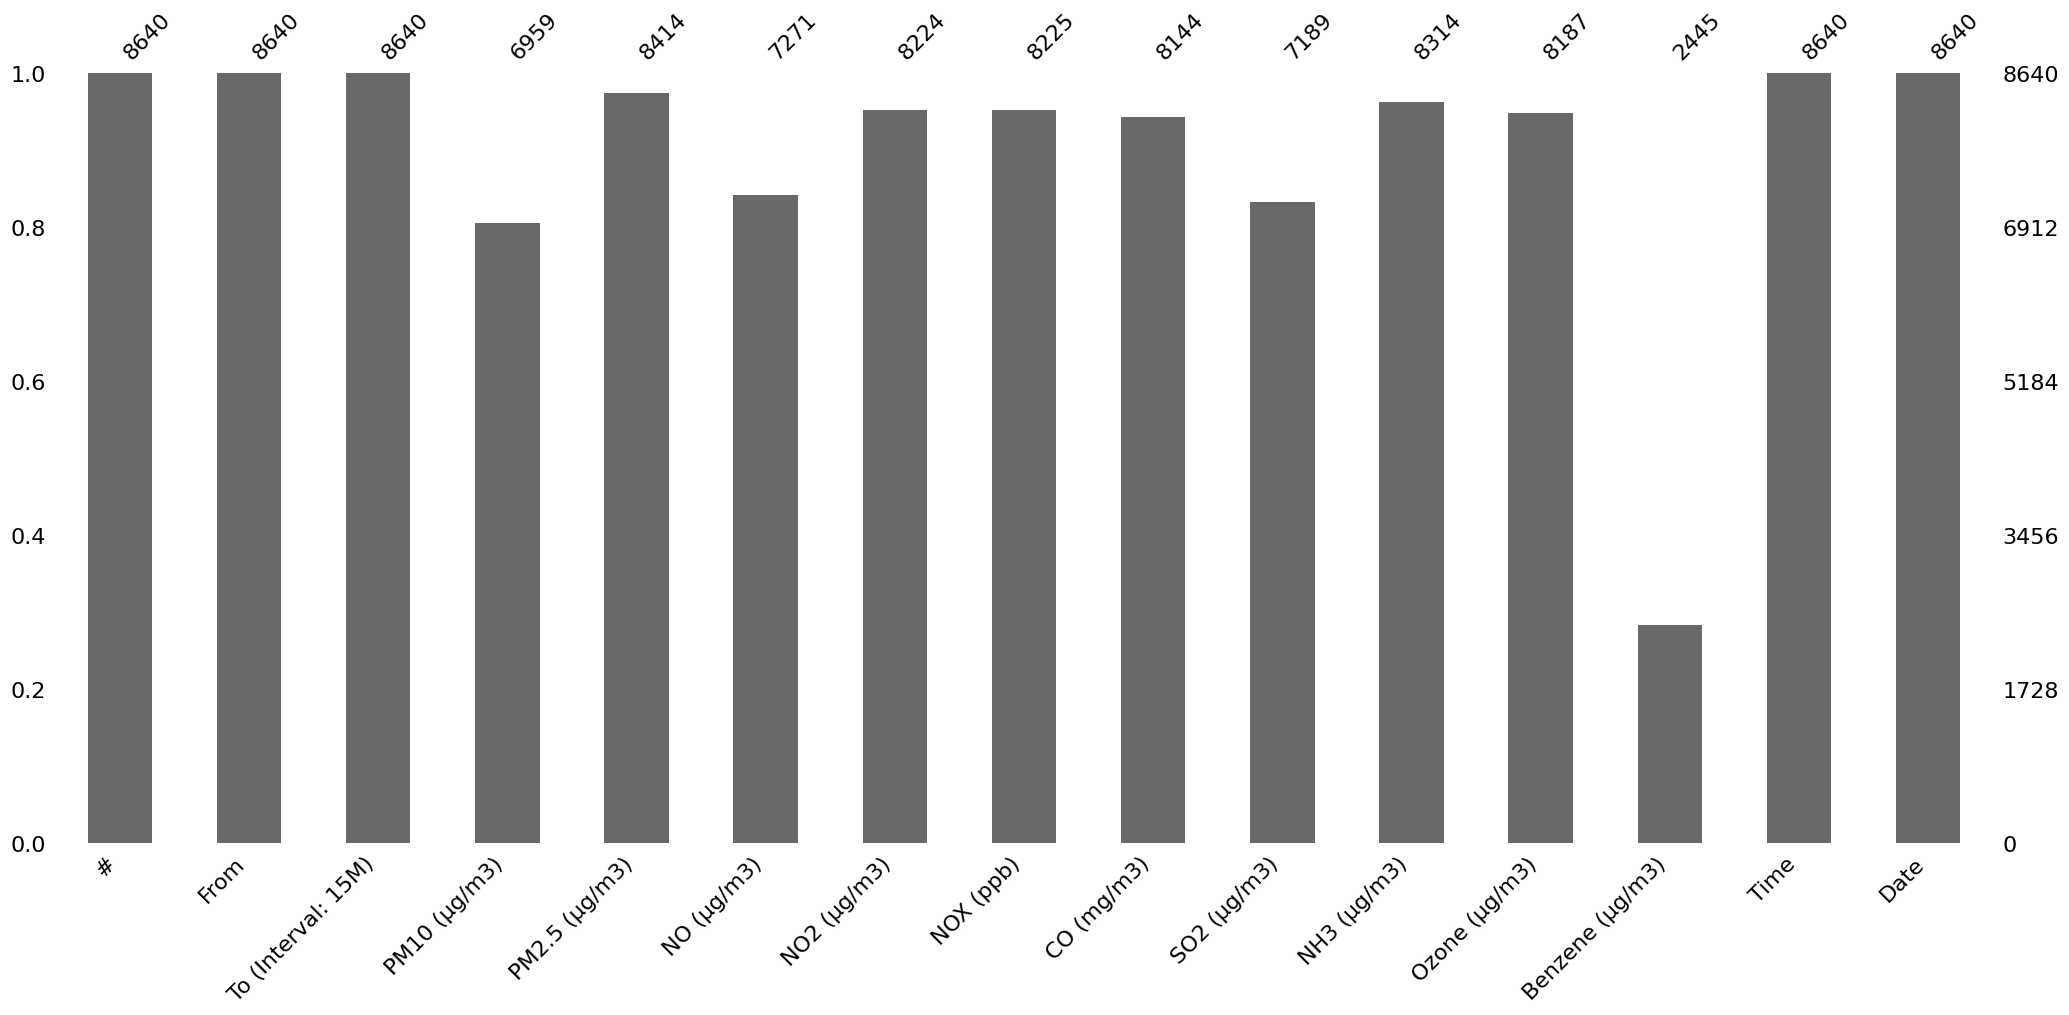

In [ ]:
import missingno as msno
msno.bar(df)

<Axes: >

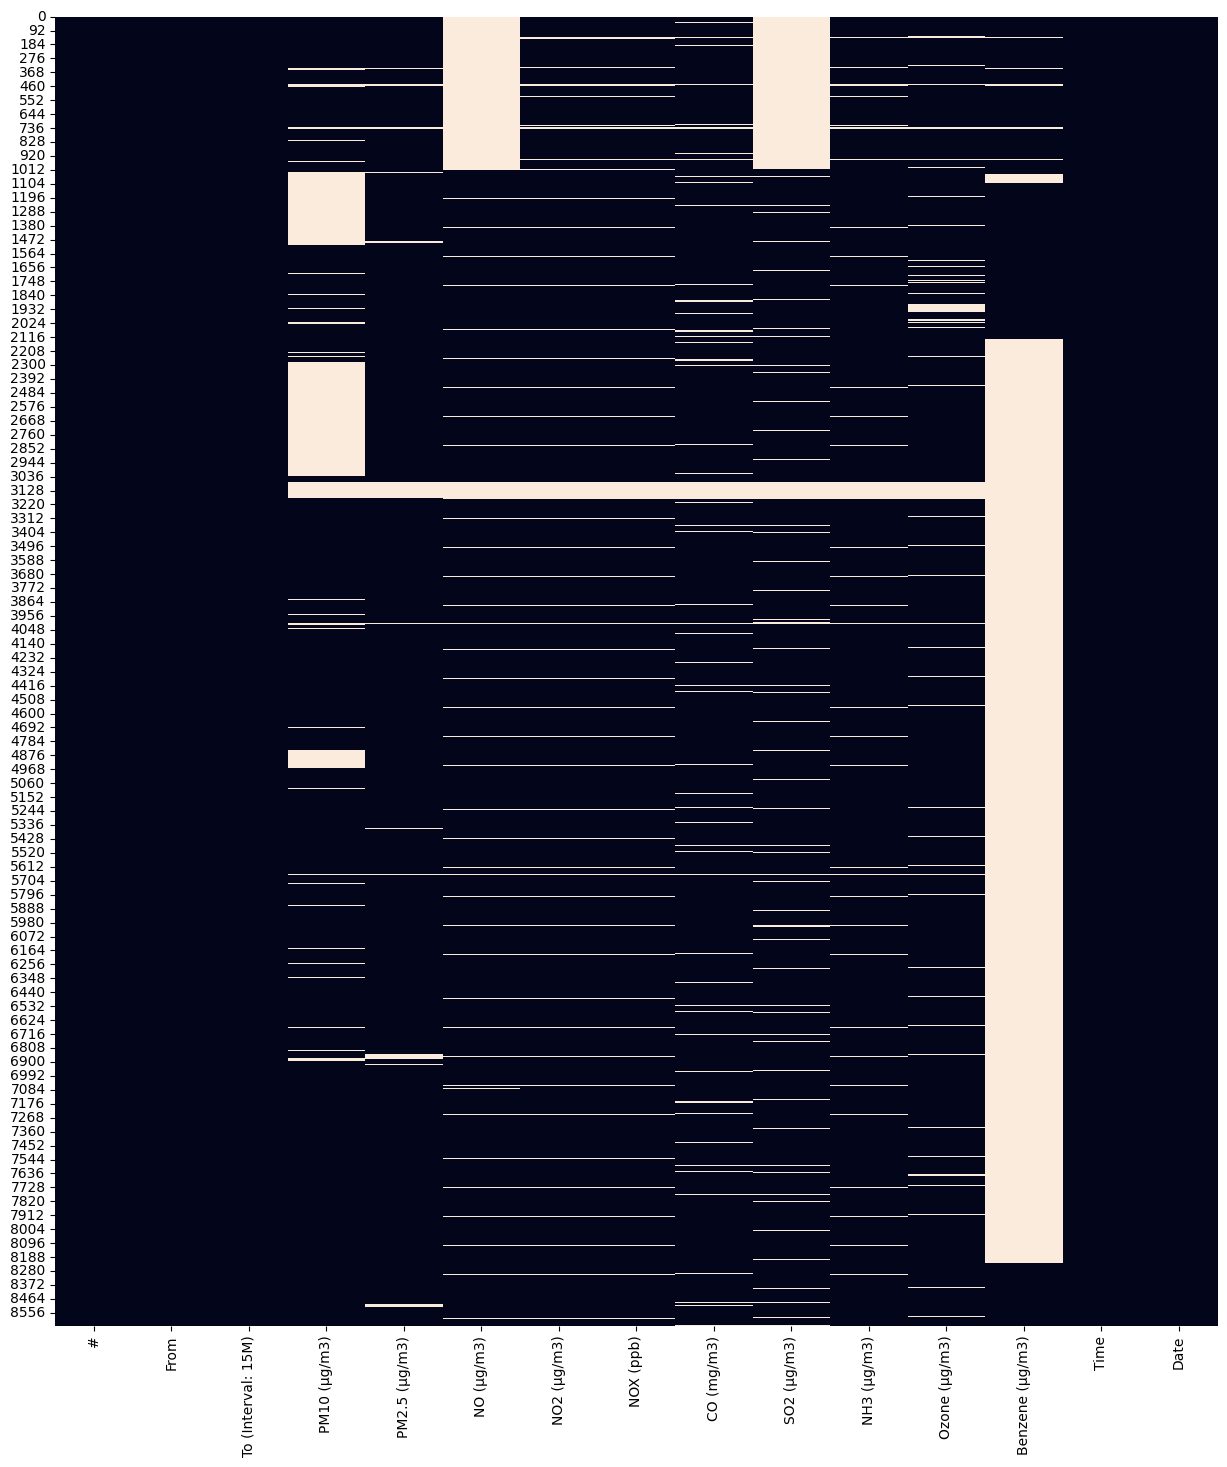

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

##Checking for the missing values
Largest Number of Missing Values in features - PM10, NO, SO2, Benzene

In [ ]:
import plotly.express as px

fig = px.line(df, x='From', y='PM10 (µg/m3)', title='PM10 with slider')

fig.update_xaxes (
    rangeslider_visible = True,
    rangeselector = dict(
        buttons=list([
            dict(count=1, label='Day1',step="day",stepmode="backward"),
            dict(count=2, label='Day2',step="day",stepmode="backward"),
            dict(count=3, label='Day3',step="day",stepmode="backward"),
            dict(count=4, label='Day4',step="day",stepmode="backward"),
            dict(count=5, label='Day5',step="day",stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
df

,#,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3),Time,Date
0,1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4,00:00:00,2023-02-01
1,2,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4,00:15:00,2023-02-01
2,3,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4,00:30:00,2023-02-01
3,4,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4,00:45:00,2023-02-01
4,5,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4,01:00:00,2023-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,8636,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1,22:45:00,2023-05-01
8636,8637,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1,23:00:00,2023-05-01
8637,8638,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1,23:15:00,2023-05-01
8638,8639,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8,100.2,70.2,0.58,9.5,10.8,30.0,0.1,23:30:00,2023-05-01


In [ ]:
ok=df[['PM10 (µg/m3)', 'From']]

In [ ]:
ok.isna().sum()

PM10 (µg/m3)    1681
From               0
dtype: int64

<Axes: >

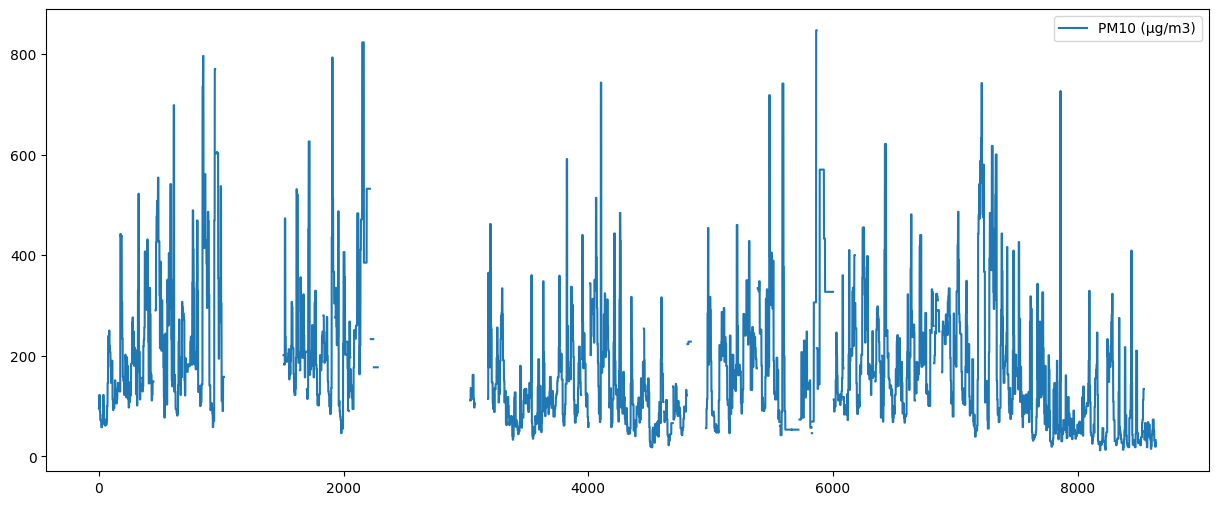

In [ ]:
rcParams['figure.figsize'] = 15, 6
ok['PM10 (µg/m3)'].plot(legend=True)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

<Axes: >

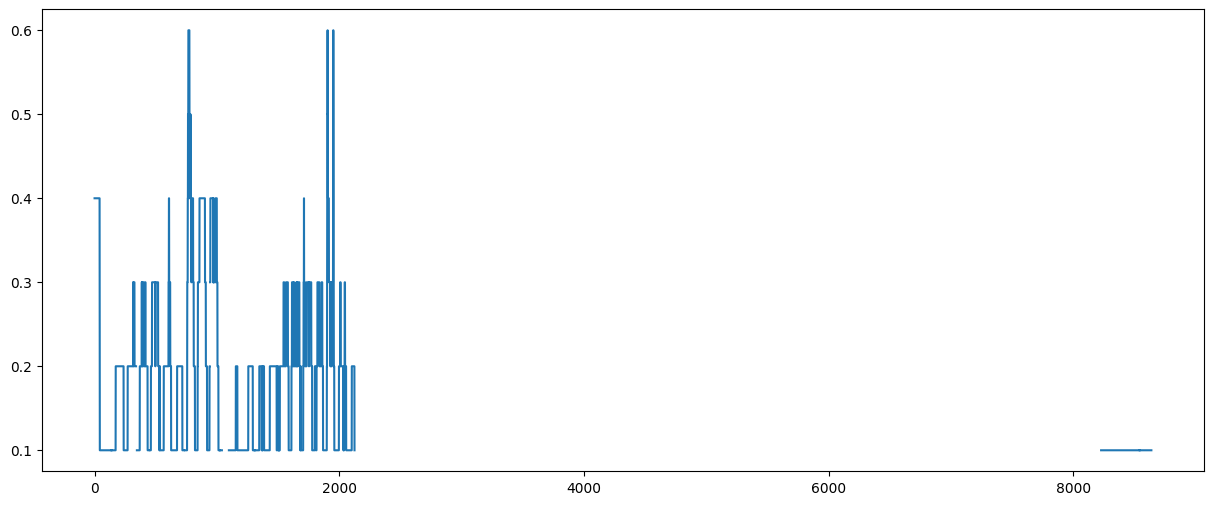

In [ ]:
df['Benzene (µg/m3)'].plot()

In [ ]:
values = df['PM10 (µg/m3)']
nan_indices = values.index[values.isna()]

In [ ]:
nan_indices = df['PM10 (µg/m3)'].index[df['PM10 (µg/m3)'].isna()]

In [ ]:
ok.iloc[52]

PM10 (µg/m3)                   61.0
From            2023-02-01 13:00:00
Name: 52, dtype: object

In [ ]:
nan_indices

Int64Index([ 340,  341,  342,  343,  344,  345,  346,  347,  348,  349,
            ...
            6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 8543],
           dtype='int64', length=1681)

In [ ]:
df['PM10 (µg/m3)'][nan_indices[0]]

nan

In [ ]:
ok['From']=pd.to_datetime(ok['From'])
ok['Time']=ok['From'].dt.time


# **Main code**

In [ ]:
ok.head()

,PM10 (µg/m3),From,Time
0,95.0,2023-02-01 00:00:00,00:00:00
1,95.0,2023-02-01 00:15:00,00:15:00
2,95.0,2023-02-01 00:30:00,00:30:00
3,122.0,2023-02-01 00:45:00,00:45:00
4,122.0,2023-02-01 01:00:00,01:00:00


In [ ]:
ok.tail()

,PM10 (µg/m3),From,Time
8635,19.0,2023-05-01 22:45:00,22:45:00
8636,19.0,2023-05-01 23:00:00,23:00:00
8637,19.0,2023-05-01 23:15:00,23:15:00
8638,19.0,2023-05-01 23:30:00,23:30:00
8639,32.0,2023-05-01 23:45:00,23:45:00


In [ ]:
date_ = int((len(ok['PM10 (µg/m3)'])*8)/10)
# train_end_df = new_df[new_df['#'] == date_]
# train_end = train_end_df['Date']
# test_end = new_df.tail(1)['Date']

train_data = ok.iloc[:date_]
test_data = ok.iloc[date_ :]

In [ ]:
filled_df = pd.DataFrame()

In [ ]:
ok=df[['PM10 (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(0, len(ok)):
    if pd.isnull(ok['PM10 (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['PM10 (µg/m3)']
        train_data.dropna(inplace=True)
        o=len(train_data)/2
        order = (4, 2, 4)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['PM10 (µg/m3)'][i]=predicted_value

In [ ]:
filled_df['PM10 (µg/m3)'] = ok['PM10 (µg/m3)']

In [ ]:
ok['Time']=ok['From'].dt.time

In [ ]:
ok['Date']=ok['From'].dt.date

In [ ]:
filled_df['Time'] = ok['From'].dt.time
filled_df['Date'] = ok['From'].dt.date

In [ ]:
len(ok)

8640

In [ ]:
filled_df['PM10 (µg/m3)'].isna().sum()

0

In [ ]:
uniq = ok['Time'].unique()

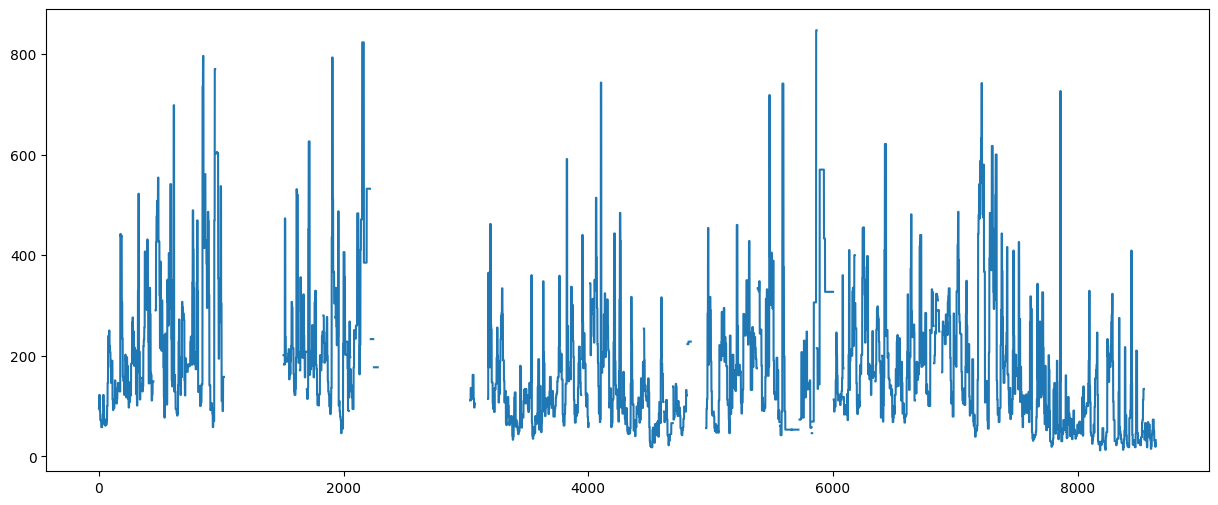

In [ ]:
plt.plot(df['PM10 (µg/m3)'])

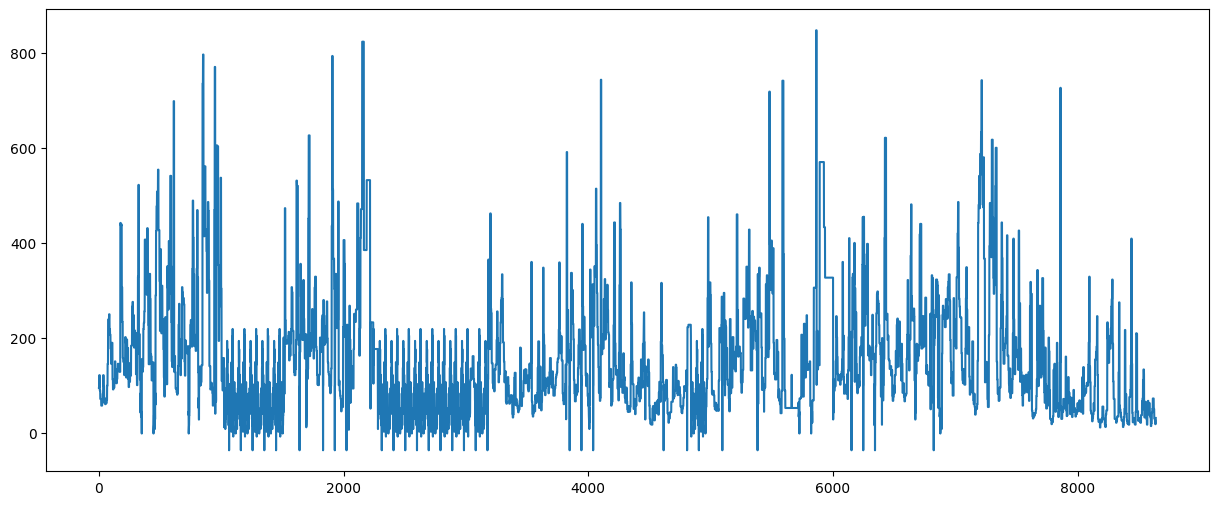

In [ ]:
plt.plot(filled_df['PM10 (µg/m3)'])

<Axes: >

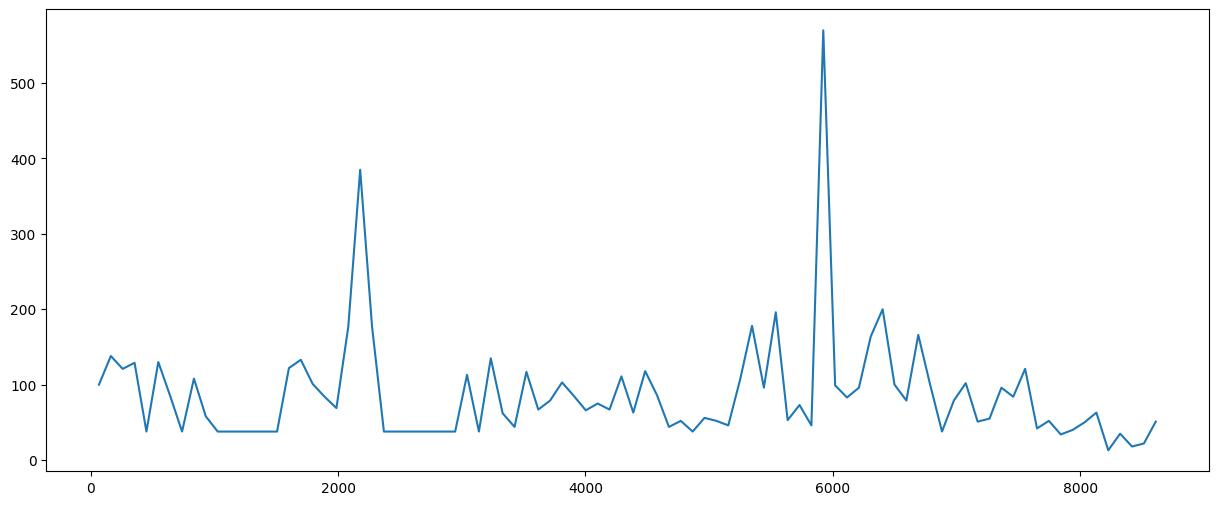

In [ ]:
t=filled_df['Time'][67]
# ok['Time']=ok['From'].dt.time
filtered_df = filled_df[filled_df['Time'] == t]
filtered_df['PM10 (µg/m3)'].plot()

<Axes: >

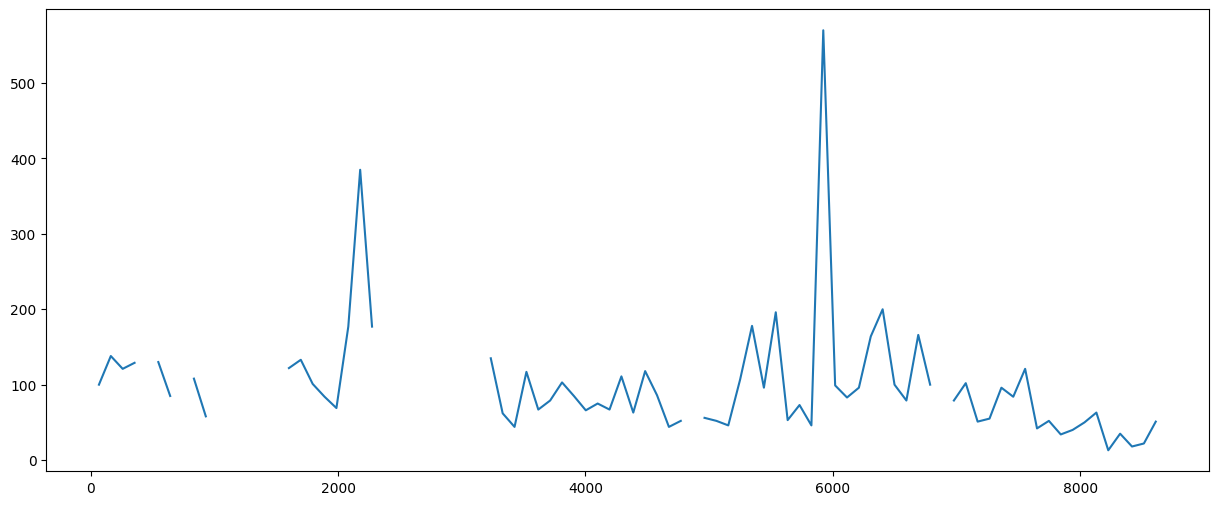

In [ ]:
filtered_df_1 = df[df['Time'] == t]
filtered_df_1['PM10 (µg/m3)'].plot()

In [ ]:
uniq

array([datetime.time(0, 0), datetime.time(0, 15), datetime.time(0, 30),
       datetime.time(0, 45), datetime.time(1, 0), datetime.time(1, 15),
       datetime.time(1, 30), datetime.time(1, 45), datetime.time(2, 0),
       datetime.time(2, 15), datetime.time(2, 30), datetime.time(2, 45),
       datetime.time(3, 0), datetime.time(3, 15), datetime.time(3, 30),
       datetime.time(3, 45), datetime.time(4, 0), datetime.time(4, 15),
       datetime.time(4, 30), datetime.time(4, 45), datetime.time(5, 0),
       datetime.time(5, 15), datetime.time(5, 30), datetime.time(5, 45),
       datetime.time(6, 0), datetime.time(6, 15), datetime.time(6, 30),
       datetime.time(6, 45), datetime.time(7, 0), datetime.time(7, 15),
       datetime.time(7, 30), datetime.time(7, 45), datetime.time(8, 0),
       datetime.time(8, 15), datetime.time(8, 30), datetime.time(8, 45),
       datetime.time(9, 0), datetime.time(9, 15), datetime.time(9, 30),
       datetime.time(9, 45), datetime.time(10, 0), datetime.t

In [ ]:
len(uniq)

96

In [ ]:
ok['Date'][0]

datetime.date(2023, 2, 1)

In [ ]:
for ti in uniq:
  alpha = []
  for i in range(len(ok)):
    if ti==filled_df['Time'][i]:
      alpha.append(filled_df['PM10 (µg/m3)'][i])
    else :
      continue

  ytrain = alpha[:73]
  ytest = alpha[73:]
  # stepwise_fit = auto_arima(ytrain,trace=True, suppress_warnings=True)
  # model = stepwise_fit.fit(ytrain)
  # pred = model.predict(start=start,end=end,typ='levels')
  # print(pred)
  model = ARIMA(ytrain, order=(4,1,4))
  model_fit = model.fit()
  predicted_value = model_fit.predict(start=len(ytrain), end=len(ytrain)+len(ytest)-1)




In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,predicted_value)

-0.2506611175276494

In [ ]:
from sklearn.metrics import r2_score

R2Val = []
for j in range(len(uniq)):
  alpha = []
  for i in range(len(ok)):
      if uniq[j]==filled_df['Time'][i]:
        alpha.append(filled_df['PM10 (µg/m3)'][i])
      else :
        continue

  ytrain = alpha[:73]
  ytest = alpha[73:]
  model = ARIMA(ytrain, order=(4,1,4))
  model_fit = model.fit()
  predicted_value = model_fit.predict(start=len(ytrain), end=len(ytrain)+len(ytest)-1)
  R2Val.append(r2_score(ytest,predicted_value))

In [ ]:
predicted_value

array([199.11425386, 229.38690443, 196.43627561, 222.73015487,
       201.90237682, 209.70000062, 210.17798123, 200.62406789,
       213.2154479 , 199.24043831, 210.18459467, 202.9133677 ,
       205.08801642, 206.78154283, 201.98327435, 207.88683356,
       202.0803172 ])

In [ ]:
xxx = np.array(R2Val)
xxx.mean()

-0.747125052595333

In [ ]:
# op = pd.DataFrame(columns=['0', '1', 'ytest'])
# i=0
# while (i+2<len(ok)):
#   op.loc[i] = [ok['PM10 (µg/m3)'][i], ok['PM10 (µg/m3)'][i+1], ok['PM10 (µg/m3)'][i+2]]
#   i+=1

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,predicted_value)

-0.2506611175276494

In [ ]:
date_ = int((len(ok)*8)/10)
# train_end_df = new_df[new_df['#'] == date_]
# train_end = train_end_df['Date']
# test_end = new_df.tail(1)['Date']

train_data1 = filled_df.iloc[:date_]
test_data1 = filled_df.iloc[date_ :]

In [ ]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PM10 (µg/m3)  8640 non-null   float64
 1   Time          8640 non-null   object 
 2   Date          8640 non-null   object 
dtypes: float64(1), object(2)
memory usage: 202.6+ KB


In [ ]:
train_data1

,PM10 (µg/m3),Time,Date
0,95.0,00:00:00,2023-02-01
1,95.0,00:15:00,2023-02-01
2,95.0,00:30:00,2023-02-01
3,122.0,00:45:00,2023-02-01
4,122.0,01:00:00,2023-02-01
...,...,...,...
6907,241.0,22:45:00,2023-04-13
6908,241.0,23:00:00,2023-04-13
6909,241.0,23:15:00,2023-04-13
6910,241.0,23:30:00,2023-04-13


In [ ]:
model1 = ARIMA(train_data1['PM10 (µg/m3)'], order=(4,1,4))
result = model1.fit()

In [ ]:
test_data1

,PM10 (µg/m3),Time,Date
6912,244.0,00:00:00,2023-04-14
6913,244.0,00:15:00,2023-04-14
6914,244.0,00:30:00,2023-04-14
6915,223.0,00:45:00,2023-04-14
6916,223.0,01:00:00,2023-04-14
...,...,...,...
8635,19.0,22:45:00,2023-05-01
8636,19.0,23:00:00,2023-05-01
8637,19.0,23:15:00,2023-05-01
8638,19.0,23:30:00,2023-05-01


In [ ]:
pred = result.predict(start=len(train_data1)+1,end=len(test_data1)+len(train_data1),typ='levels')
print(pred)

6913    232.403724
6914    237.551785
6915    226.742691
6916    216.500746
6917    221.620507
           ...    
8636    200.820489
8637    200.820489
8638    200.820489
8639    200.820489
8640    200.820489
Name: predicted_mean, Length: 1728, dtype: float64


In [ ]:
from sklearn.metrics import r2_score
r2_score(test_data1['PM10 (µg/m3)'],pred)

-0.18668695298681848

In [ ]:
ok=df[['NO (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['NO (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['NO (µg/m3)']
        train_data.dropna(inplace=True)
        if(len(train_data)<2):
          continue
        o=len(train_data)/2
        order = (0, 3, 2)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['NO (µg/m3)'][i]=predicted_value

In [ ]:
print(ok['NO (µg/m3)'].isna().sum())
ok['NO (µg/m3)'].bfill(inplace=True)
print(ok['NO (µg/m3)'].isna().sum())

192
0


In [ ]:
filled_df['NO (µg/m3)'] = ok['NO (µg/m3)']

In [ ]:
ok=df[['PM2.5 (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['PM2.5 (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['PM2.5 (µg/m3)']
        train_data.dropna(inplace=True)
        o=len(train_data)/2
        order = (4, 1, 4)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['PM2.5 (µg/m3)'][i]=predicted_value

In [ ]:
filled_df['PM2.5 (µg/m3)'] = ok['PM2.5 (µg/m3)']

In [ ]:
ok=df[['NO2 (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['NO2 (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['NO2 (µg/m3)']
        train_data.dropna(inplace=True)
        if(len(train_data)<2):
          continue
        o=len(train_data)/2
        order = (4, 1, 4)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['NO2 (µg/m3)'][i]=predicted_value

In [ ]:
ok['NO2 (µg/m3)'].bfill(inplace=True)

In [ ]:
ok['NO2 (µg/m3)'].isna().sum()

0

In [ ]:
filled_df['NO2 (µg/m3)'] = ok['NO2 (µg/m3)']

In [ ]:
ok=df[['NOX (ppb)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['NOX (ppb)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['NOX (ppb)']
        train_data.dropna(inplace=True)
        if(len(train_data)<2):
          continue
        o=len(train_data)/2
        order = (4, 1, 2)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['NOX (ppb)'][i]=predicted_value

In [ ]:
ok['NOX (ppb)'].bfill(inplace=True)

In [ ]:
filled_df['NOX (ppb)'] = ok['NOX (ppb)']

In [ ]:
filled_df['NOX (ppb)'].isna().sum()

0

In [ ]:
ok=df[['CO (mg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['CO (mg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['CO (mg/m3)']
        train_data.dropna(inplace=True)
        if(len(train_data)<2):
          continue
        o=len(train_data)/2
        order = (3, 1, 2)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['CO (mg/m3)'][i]=predicted_value

In [ ]:
ok['CO (mg/m3)'].bfill(inplace=True)

In [ ]:
filled_df['CO (mg/m3)'] = ok['CO (mg/m3)']

In [ ]:
filled_df['CO (mg/m3)'].isna().sum()

0

In [ ]:
ok=df[['SO2 (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['SO2 (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['SO2 (µg/m3)']
        train_data.dropna(inplace=True)
        if(len(train_data)<2):
          continue
        o=len(train_data)/2
        order = (3, 3, 4)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['SO2 (µg/m3)'][i]=predicted_value

In [ ]:
ok['SO2 (µg/m3)'].bfill(inplace=True)
filled_df['SO2 (µg/m3)'] = ok['SO2 (µg/m3)']
filled_df['SO2 (µg/m3)'].isna().sum()

0

In [ ]:
ok=df[['NH3 (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['NH3 (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['NH3 (µg/m3)']
        train_data.dropna(inplace=True)
        if(len(train_data)<2):
          continue
        o=len(train_data)/2
        order = (4, 0, 4)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['NH3 (µg/m3)'][i]=predicted_value

In [ ]:
ok['NH3 (µg/m3)'].bfill(inplace=True)
filled_df['NH3 (µg/m3)'] = ok['NH3 (µg/m3)']
filled_df['NH3 (µg/m3)'].isna().sum()

0

In [ ]:
ok=df[['Ozone (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['Ozone (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['Ozone (µg/m3)']
        train_data.dropna(inplace=True)
        if(len(train_data)<2):
          continue
        o=len(train_data)/2
        order = (2, 0, 2)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['Ozone (µg/m3)'][i]=predicted_value

In [ ]:
ok['Ozone (µg/m3)'].bfill(inplace=True)
filled_df['Ozone (µg/m3)'] = ok['Ozone (µg/m3)']
filled_df['Ozone (µg/m3)'].isna().sum()

0

In [ ]:
filled_df['Benzene (µg/m3)'] = df['Benzene (µg/m3)']

In [ ]:
filled_df['Benzene (µg/m3)'].fillna(filled_df['Benzene (µg/m3)'].mean(),inplace=True)

In [ ]:
filled_df.to_csv(r'/content/drive/MyDrive/Data Science/Complete_Blasting_info.csv')

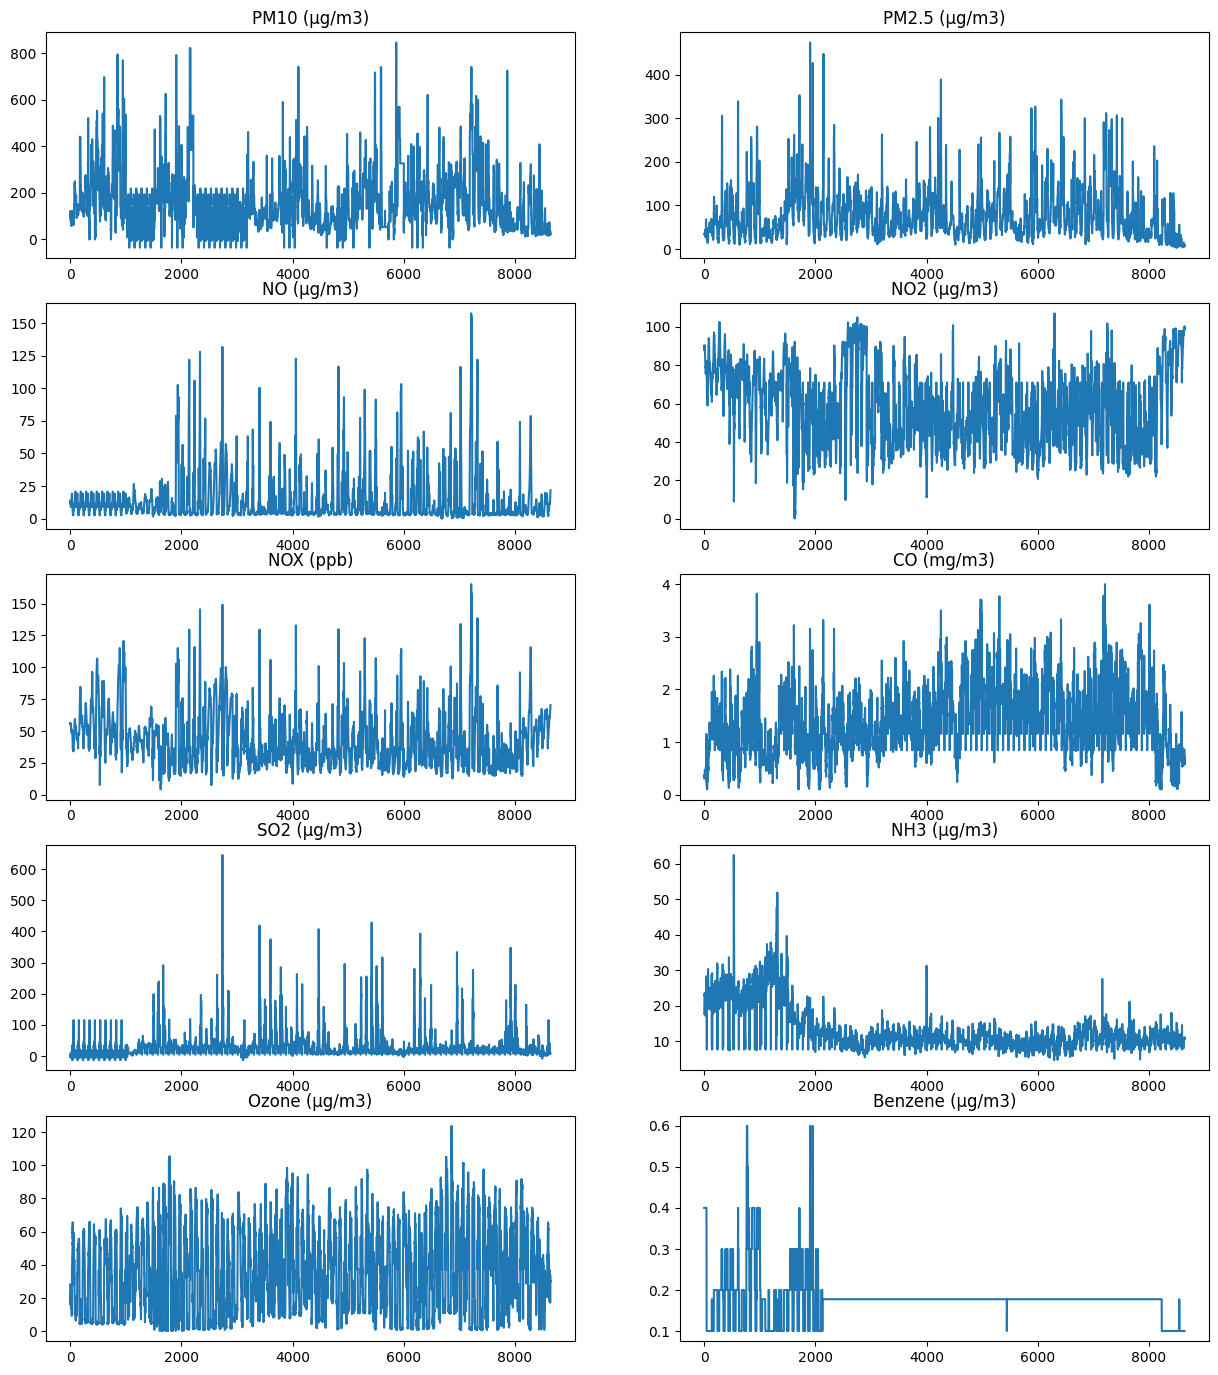

In [ ]:
# To plot multivariate data
rcParams['figure.figsize'] = 15, 17
figure, axis = plt.subplots(5,2)
axis[0,0].plot(filled_df['PM10 (µg/m3)'])
axis[0,0].set_title("PM10 (µg/m3)")
axis[0,1].plot(filled_df['PM2.5 (µg/m3)'])
axis[0,1].set_title("PM2.5 (µg/m3)")
axis[1,0].plot(filled_df['NO (µg/m3)'])
axis[1,0].set_title("NO (µg/m3)")
axis[1,1].plot(filled_df['NO2 (µg/m3)'])
axis[1,1].set_title("NO2 (µg/m3)")
axis[2,0].plot(filled_df['NOX (ppb)'])
axis[2,0].set_title('NOX (ppb)')
axis[2,1].plot(filled_df['CO (mg/m3)'])
axis[2,1].set_title('CO (mg/m3)')
axis[3,0].plot(filled_df['SO2 (µg/m3)'])
axis[3,0].set_title('SO2 (µg/m3)')
axis[3,1].plot(filled_df['NH3 (µg/m3)'])
axis[3,1].set_title('NH3 (µg/m3)')
axis[4,0].plot(filled_df['Ozone (µg/m3)'])
axis[4,0].set_title('Ozone (µg/m3)')
axis[4,1].plot(filled_df['Benzene (µg/m3)'])
axis[4,1].set_title('Benzene (µg/m3)')
ax = plt.gca()
# ax.tick_params(axis='x', labelrotation = 45)
plt.show()

In [ ]:
df.columns

Index(['#', 'From', 'To (Interval: 15M)', 'PM10 (µg/m3)', 'PM2.5 (µg/m3)',
       'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)',
       'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)', 'Time', 'Date'],
      dtype='object')

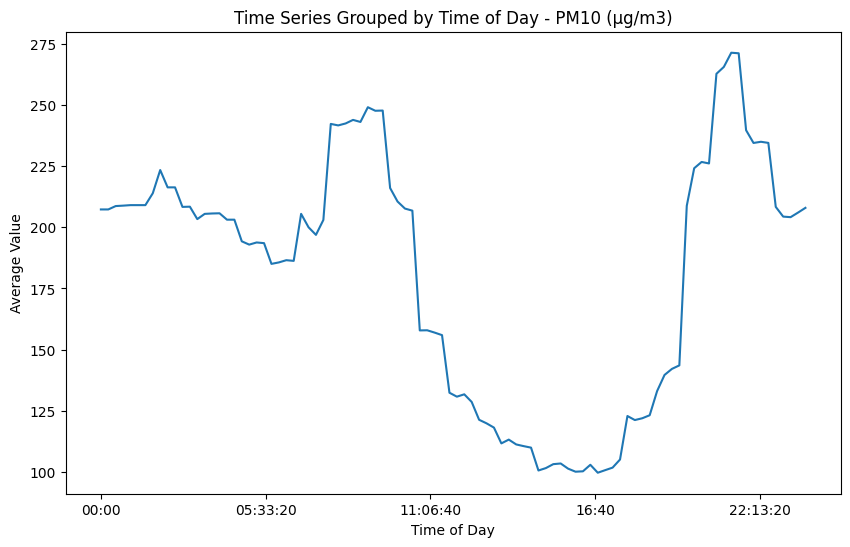

In [ ]:
ok=df[['PM10 (µg/m3)', 'From']]
timestamps = pd.to_datetime(ok['From'])
values = ok['PM10 (µg/m3)']

ok['From'] = timestamps.dt.time
grouped_data = ok.groupby('From')['PM10 (µg/m3)'].mean()


plt.figure(figsize=(10, 6))
grouped_data.plot()
plt.xlabel('Time of Day')
plt.ylabel('Average Value')
plt.title('Time Series Grouped by Time of Day - PM10 (µg/m3)')
plt.show()

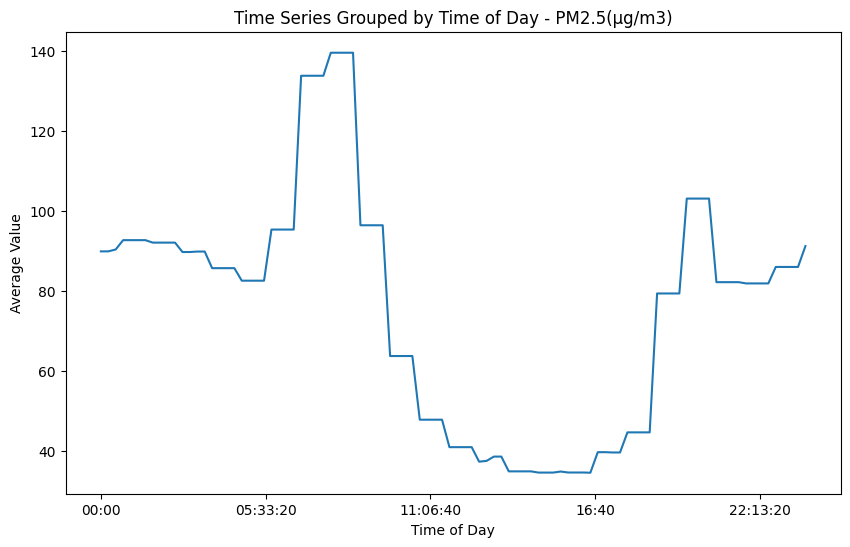

In [ ]:
ok=df[['PM2.5 (µg/m3)', 'From']]
ok['From']=pd.to_datetime(ok['From'])
cd=ok.copy()
cd['Time']=cd['From'].dt.time
for i in range(1, len(ok)):
    if pd.isnull(ok['PM2.5 (µg/m3)'][i]):
        # Collect past values with the same time
        train_data = cd[cd['Time'] == cd['Time'][i-1]]['PM2.5 (µg/m3)']
        train_data.dropna(inplace=True)
        o=len(train_data)/2
        order = (2, 1, 2)  # AR order (p), differencing order (d), MA order (q)
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predicted_value = model_fit.predict(start=len(train_data), end=len(train_data))  # Predict the missing value
        ok['PM2.5 (µg/m3)'][i]=predicted_value

ok=df[['PM2.5 (µg/m3)', 'From']]
timestamps = pd.to_datetime(ok['From'])
values = ok['PM2.5 (µg/m3)']

ok['From'] = timestamps.dt.time
grouped_data = ok.groupby('From')['PM2.5 (µg/m3)'].mean()


plt.figure(figsize=(10, 6))
grouped_data.plot()
plt.xlabel('Time of Day')
plt.ylabel('Average Value')
plt.title('Time Series Grouped by Time of Day - PM2.5(µg/m3)')
plt.show()

#Calculating the AQI

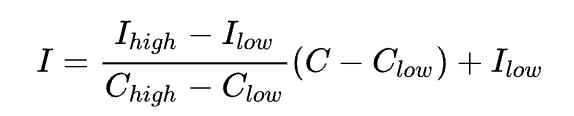

In [ ]:
aqi

,PM10 C Low,PM10 C high,PM2.5 C Low,PM2.5 C high,CO C Low,CO C high,SO2 C Low,SO2 C high,NO2 C Low,NO2 C high,NOX C low,NOX C high,O3 C Low,O3 C high,AQI ILow,AQI Ihigh
0,0,54,0.0,12.0,0.0,4.4,0,35,0,53,0,40.0,0.000,0.540,0,50
1,55,154,12.1,35.4,4.5,9.4,36,75,54,100,81,180.0,0.055,0.070,51,100
2,155,254,35.5,55.4,9.5,12.4,76,185,101,360,41,80.0,0.071,0.085,101,150
3,255,354,55.5,150.4,12.5,15.4,186,304,361,649,181,280.0,0.086,0.105,151,200
4,355,424,150.5,250.4,15.5,30.4,305,604,650,1249,281,400.0,0.106,0.200,201,250
5,425,504,250.5,350.4,30.5,40.4,605,804,1250,1649,400,0.0,0.000,0.000,250,300
